Key Takeaways:
1. States are not represented equally in the data - 4 states represent ~50% of the data while rest of the 50% is represented by 19 states
2. 
    

In [1]:
# Importing libararies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Defining path to district csv
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
print(parent_dir)
data_path = os.path.join(parent_dir, 'data/districts_info.csv')
print(data_path)

/Users/eshan23/eshanprashar_git_profile/kaggle_practice/L1_education/covid_edtech_usage
/Users/eshan23/eshanprashar_git_profile/kaggle_practice/L1_education/covid_edtech_usage/data/districts_info.csv


In [3]:
# Import district data
df_districts = pd.read_csv(data_path)
df_districts.info()
df_districts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove districts which cannot be mapped to states
df_districts = df_districts.dropna(subset=['state'])

# Examine count of districts per state
print('Total districts:', df_districts.shape[0])
df_districts['state'].value_counts()

Total districts: 176


state
Connecticut             30
Utah                    29
Massachusetts           21
Illinois                18
California              12
Ohio                    11
New York                 8
Indiana                  7
Washington               6
Missouri                 6
Virginia                 4
North Carolina           4
Wisconsin                3
District Of Columbia     3
New Jersey               2
Texas                    2
Tennessee                2
New Hampshire            2
Michigan                 2
Minnesota                1
Arizona                  1
Florida                  1
North Dakota             1
Name: count, dtype: int64

In [5]:
# Read the engagement data and check count of rows by state
data_path = os.path.join(parent_dir, 'data/engagement_data_filtered.parquet')
df_engagement = pd.read_parquet(data_path)
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11691587 entries, 0 to 22324188
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             int64  
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 535.2+ MB


In [6]:
# Merge the engagement data with the district data
df_engagement_districts = pd.merge(df_engagement, df_districts, how='left', on='district_id')

In [15]:
# Check count of rows by state
print(f"Average observations across state: {df_engagement_districts['state'].value_counts().mean()}")
state_wise_aggregates = df_engagement_districts.groupby('state').agg(
    unique_districts = ('district_id', 'nunique'),
    cnt_eng_idx = ('engagement_index', 'count'),
    mean_eng_idx = ('engagement_index', 'mean'),
    std_dev_eng_idx = ('engagement_index', 'std')
    ).reset_index().sort_values(by='cnt_eng_idx', ascending=False)
state_wise_aggregates

Average observations across state: 397378.3043478261


,state,unique_districts,cnt_eng_idx,mean_eng_idx,std_dev_eng_idx
2,Connecticut,30,1520577,279.718637,2484.917908
19,Utah,29,1278833,160.420553,1284.182929
5,Illinois,18,1172850,259.201274,2598.234897
7,Massachusetts,21,1142106,226.976027,2118.343879
1,California,12,673542,131.090179,1284.597436
16,Ohio,11,608886,194.395148,1704.780589
10,Missouri,6,479741,135.159105,1296.598315
21,Washington,6,359988,112.972054,1058.715541
6,Indiana,7,352358,257.594330,2003.593647
20,Virginia,4,317847,122.521047,1182.443415


In [8]:
# Let's look at simple descriptive statistics for engagement data: overall and by state
df_engagement_districts['engagement_index'].describe().round(2)
# We can see that the standard deviation is too high, which indicates we may have to remove outliers and/or apply sampling techniques

count    11691587.00
mean          207.25
std          1928.82
min             0.00
25%             0.18
50%             2.28
75%            20.18
max        152747.07
Name: engagement_index, dtype: float64

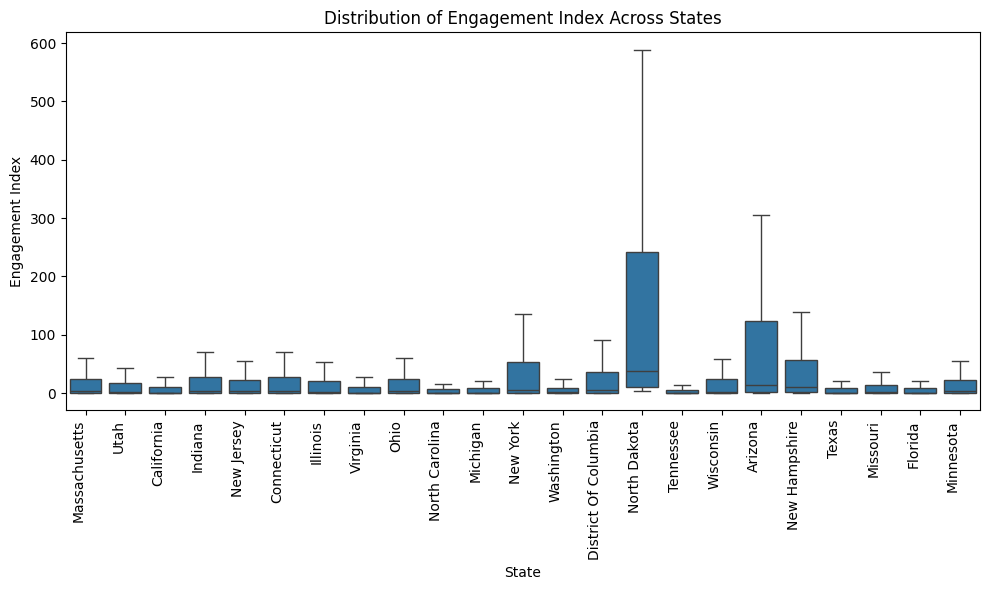

In [16]:
# Let's draw a box and whisker plot to visualize the distribution of engagement index across states
plt.close()
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='engagement_index', data=df_engagement_districts, showfliers=False)

# Rotate the x labels for better readability
plt.xticks(rotation=90, ha='right')

# Add title and labels
plt.title('Distribution of Engagement Index Across States')
plt.xlabel('State')
plt.ylabel('Engagement Index')

# Show the plot
plt.tight_layout()
plt.show()

From the plot above, we see that  
- North Dakota, 
- Arizona and 
- New Hampshire 

have the largest spread of values. 
These states also have the lowest number of observations; so we have a good reason to remove them from our dataset.

**Minnesota** presents a unique problem - the average and standard deviation seem reasonable, but number of observations, especially when compared to other states are too low

In [17]:
# Removing data for states North Dakota, Arizona and New Hampshire
states_to_remove = ['North Dakota', 'Arizona', 'New Hampshire', 'Minnesota']
df_engagement_districts_sampled = df_engagement_districts[~df_engagement_districts['state'].isin(states_to_remove)]

# Now check the overall engagement index and examine the box plot 
df_engagement_districts_sampled['engagement_index'].describe().round(2)

count    11595427.00
mean          205.46
std          1918.02
min             0.00
25%             0.18
50%             2.25
75%            19.95
max        152747.07
Name: engagement_index, dtype: float64

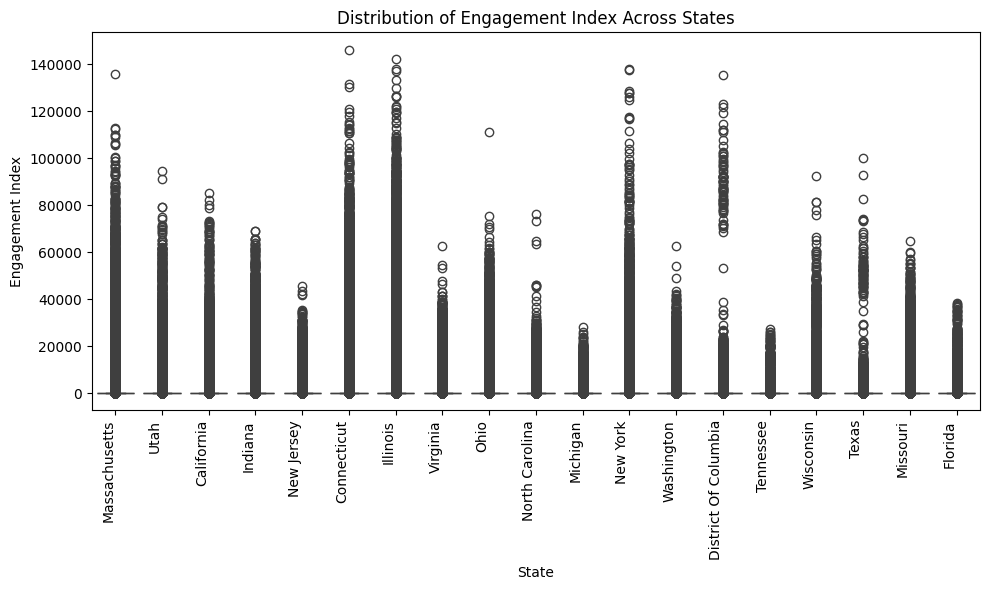

In [19]:
# Let's draw a box and whisker plot to visualize the distribution of engagement index across states
plt.close()
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='engagement_index', data=df_engagement_districts_sampled)

# Rotate the x labels for better readability
plt.xticks(rotation=90, ha='right')

# Add title and labels
plt.title('Distribution of Engagement Index Across States')
plt.xlabel('State')
plt.ylabel('Engagement Index')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

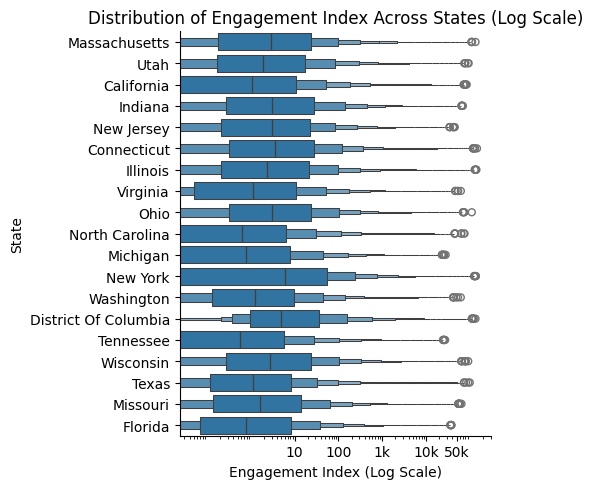

In [26]:
# Drawing spread of observations across states to examine high standard deviatons
plt.close()
plt.figure(figsize=(20, 15))
sns.catplot(y='state', x='engagement_index', data=df_engagement_districts_sampled, kind='boxen')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Customize x-axis ticks if necessary
plt.xticks([10, 100, 1000, 10000, 50000], labels=['10', '100', '1k', '10k', '50k'])

# Add title and labels
plt.title('Distribution of Engagement Index Across States (Log Scale)')
plt.ylabel('State')
plt.xlabel('Engagement Index (Log Scale)')

# Show the plot
plt.tight_layout()
plt.show()

### Reading the boxenplot:
**Link:** https://stackoverflow.com/questions/52403381/how-boxen-plot-is-different-from-box-plot  
**TLDR** - Box plot shows 50-75 percentile, and then 1.5 IQR. Boxen breaks it down in a simpler fashion

The box plot shows the median as the centerline (50th percentile), then the 25th and 75th percentile as the box boundaries. Then the IQR method is used to calculate outlier boundaries (1.5 * IQR + Q3 for the upper boundary, for example). Q3 is the 3rd quartile, or 75th percentile of the data (75% of the data is below this value). Outliers outside of the outlier whiskers are shown as distinct points.

Boxenplots (actually called letter-value plots in the original paper and in the lvplot R package; that's lv as in letter-value) show the distribution differently and are better for bigger datasets. Classic boxplots can have too many outliers and don't show as much information about the distribution. Letter-value plots (boxenplots) start with the median (Q2, 50th percentile) as the centerline. Each successive level outward contains half of the remaining data. So the first two sections out from the centerline contain 50% of the data. After that, the next two sections contain 25% of the data. This continues until we are at the outlier level.

### Notes from GPT on handling strange distribution of data
1. Use a log scale: spreads out values and compresses higher values
2. Apply similar transformation: we can use square root, cube root transformations
3. Zoom in on lower range: change the limits of axes (not ideal)
4. Facet Plot (bucketing): create buckets to visualize low, medium and high segments (executed below)

/Users/eshan23/eshanprashar_git_profile/kaggle_practice/L1_education/covid_edtech_usage/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


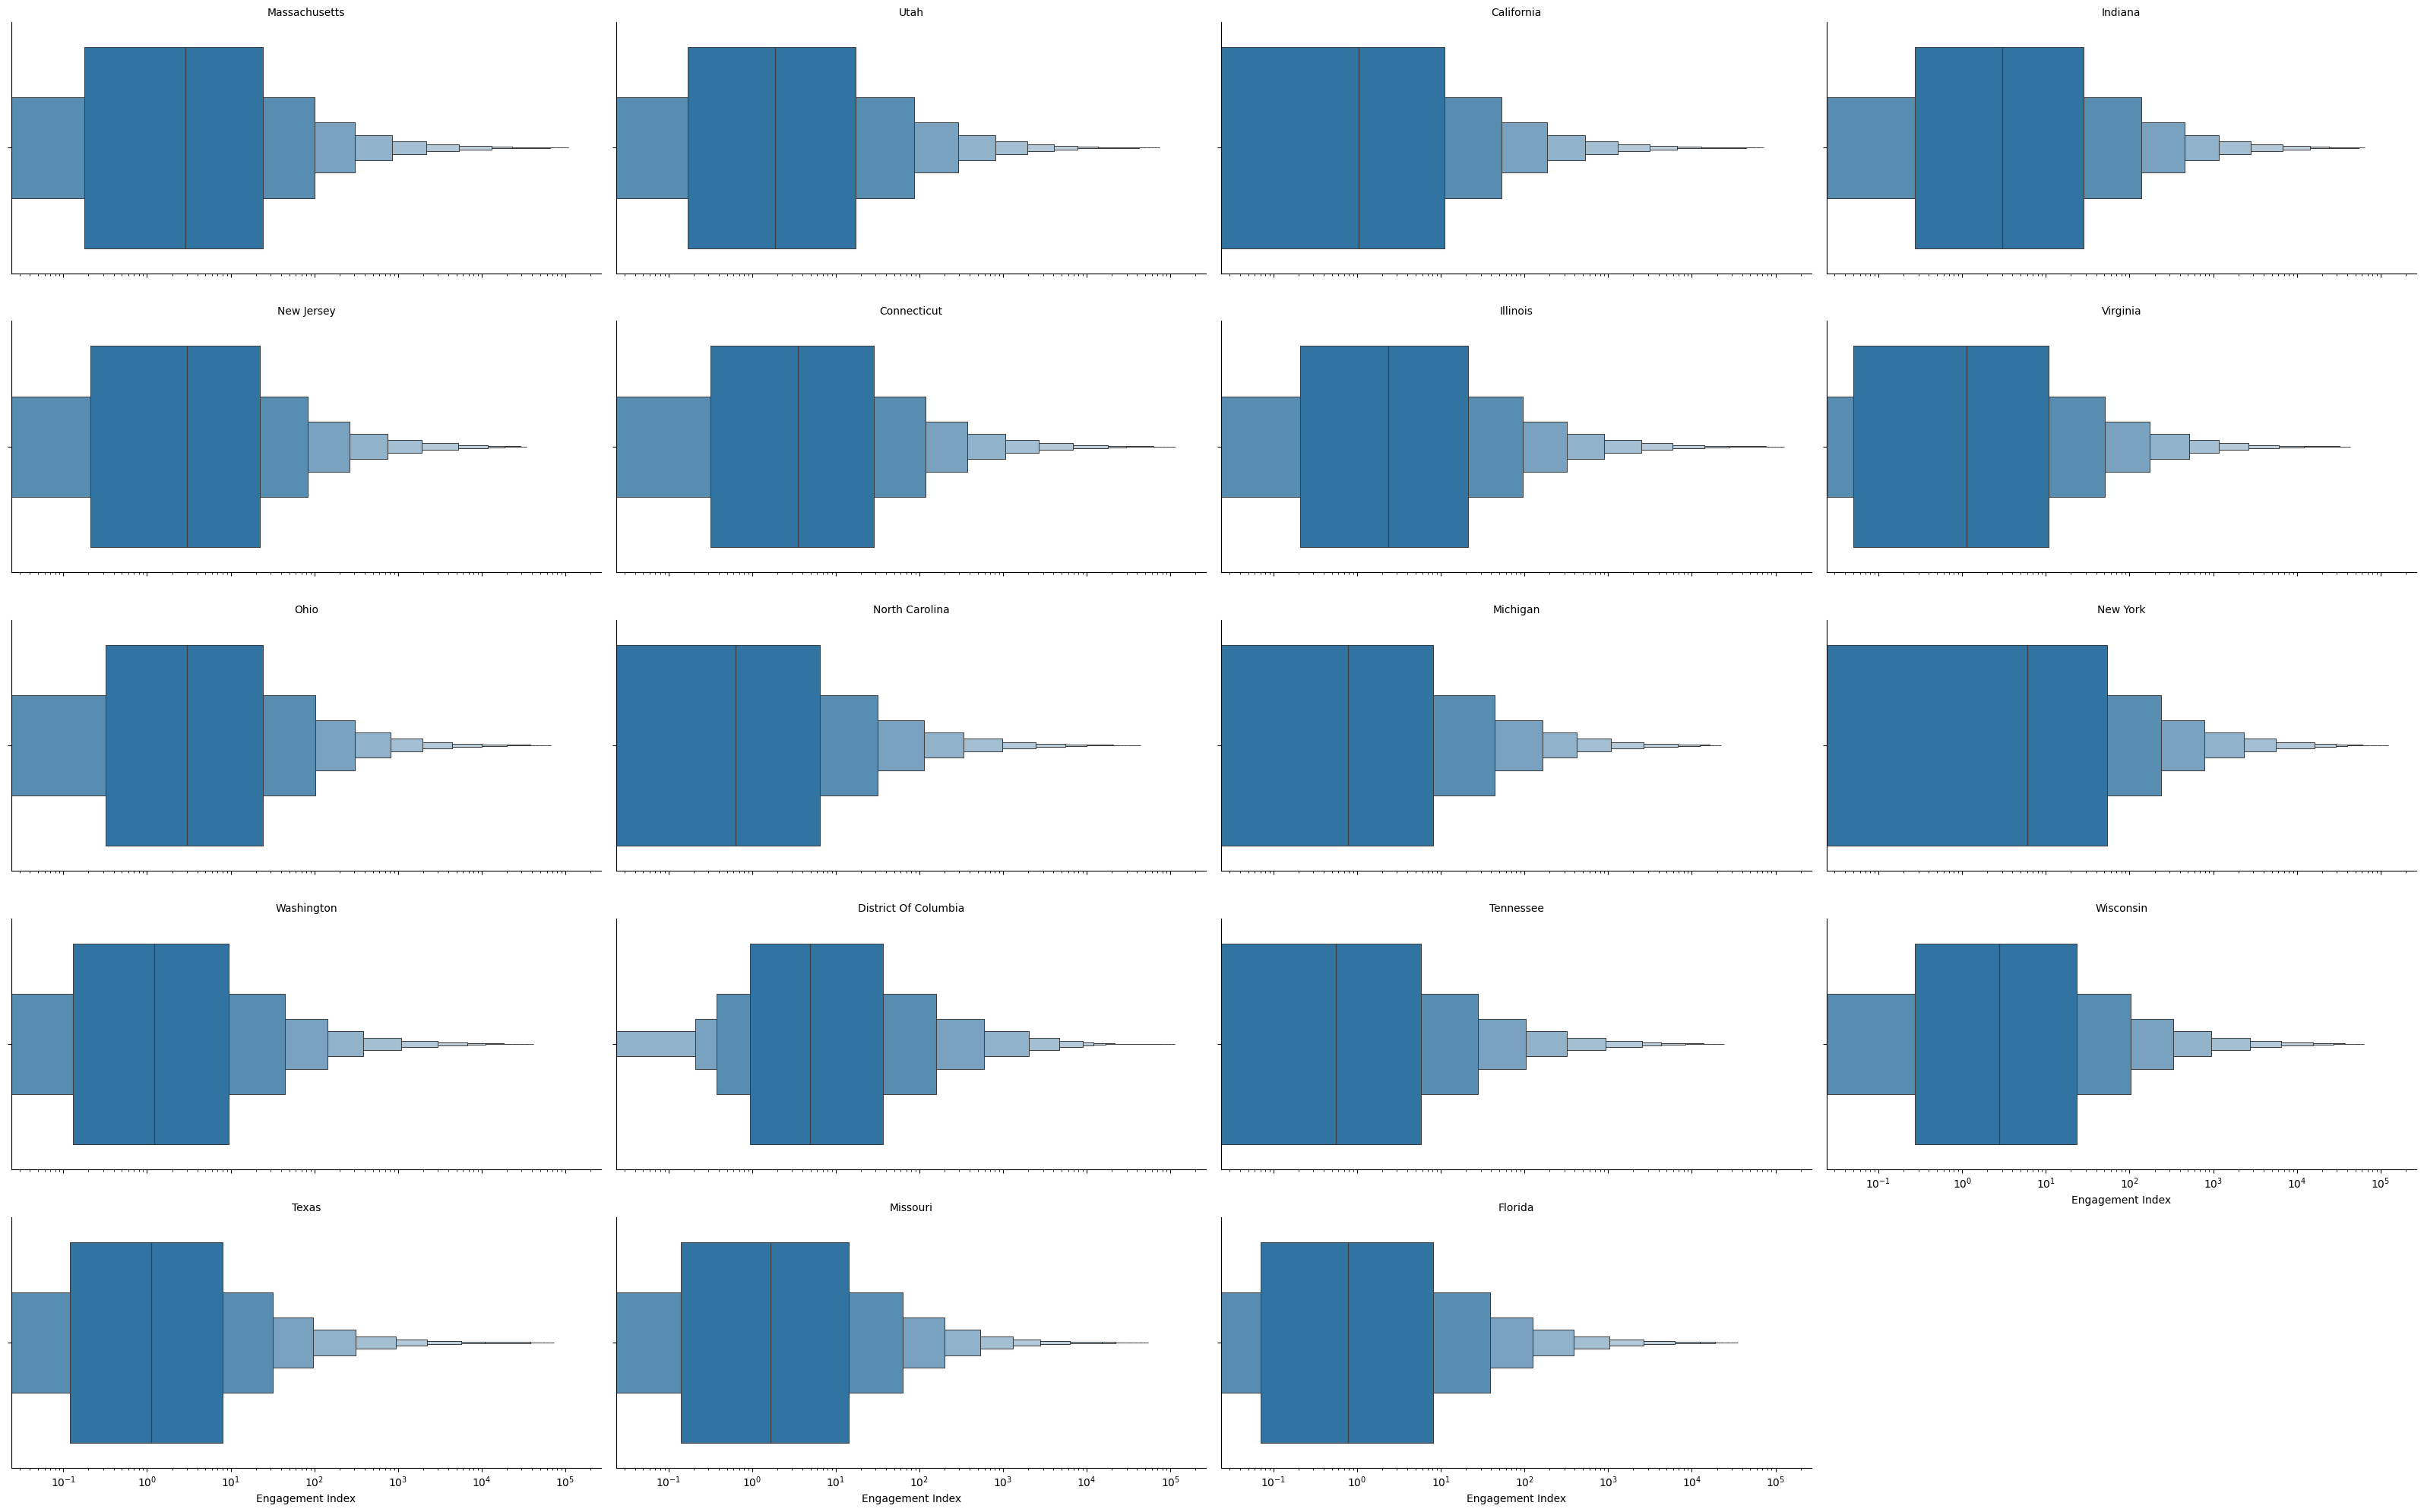

In [31]:
# Facet plot 
plt.close()
g = sns.FacetGrid(df_engagement_districts_sampled, col="state", col_wrap=4, height=4, aspect=2)
g.map(sns.boxenplot, 'engagement_index', showfliers=False)
g.set_axis_labels("Engagement Index", "")
g.set_titles("{col_name}")

# Adjust the x-axis scale to a logarithmic scale
g.set(xscale='log')

plt.tight_layout()
plt.show()

**Easier to see from here that New York and California are on the higher end of the spectrum**

/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_65373/3274637424.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='state', y='engagement_index', data=df_engagement_districts_sampled, inner='box', scale='width')


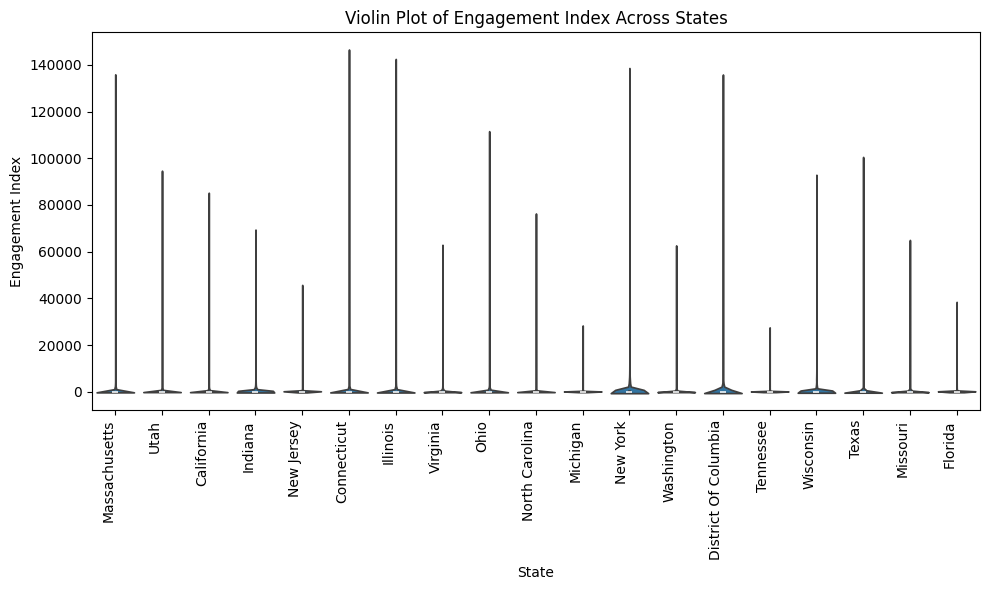

In [20]:
# Exploring other plots to examine outliers: Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='state', y='engagement_index', data=df_engagement_districts_sampled, inner='box', scale='width')

plt.xticks(rotation=90, ha='right')
plt.title('Violin Plot of Engagement Index Across States')
plt.xlabel('State')
plt.ylabel('Engagement Index')
plt.tight_layout()
plt.show()

- This is a **Violin plot** that indicates density of data at different values. From this, it seems that more states are dense around 0. 
- We may have to bin values of engagement index and see counts in each of those bins

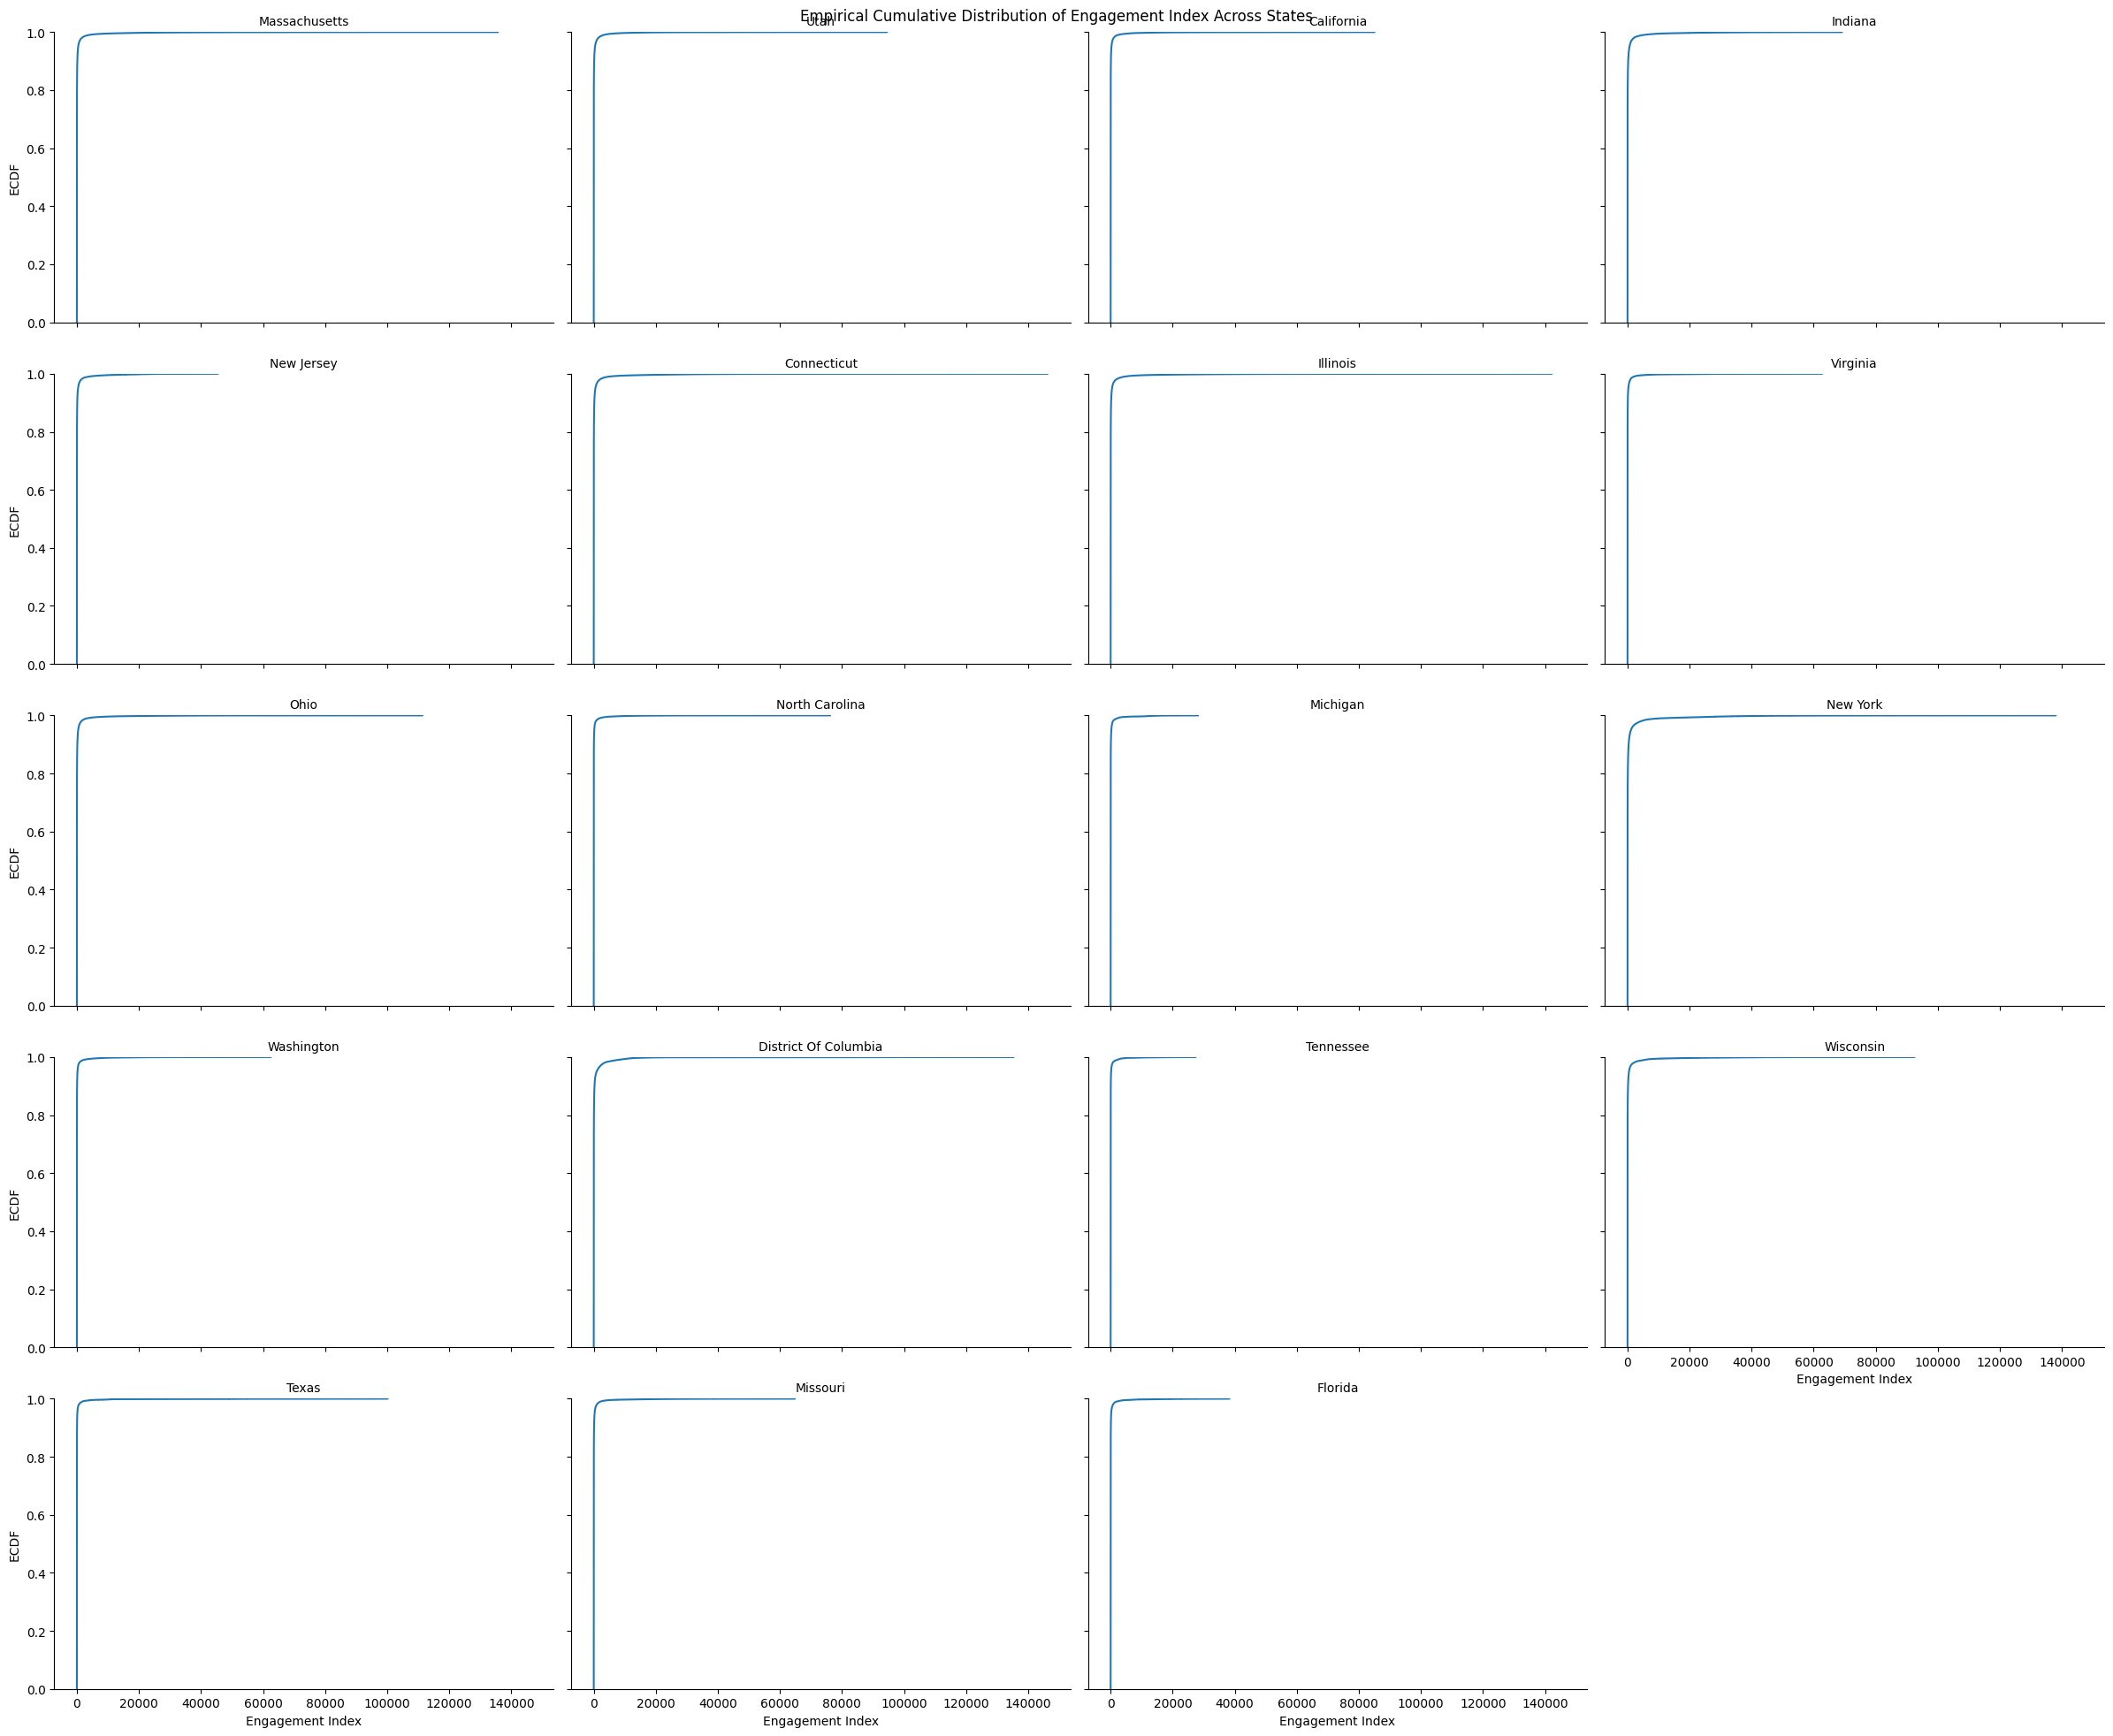

In [32]:
# Creating an ECDF plot to examine the distribution of engagement index

# Create a FacetGrid for ECDF plots for each state
g = sns.FacetGrid(df_engagement_districts_sampled, col="state", col_wrap=4, height=4, aspect=1.5)
g.map(sns.ecdfplot, "engagement_index")

# Add title and labels to each facet
g.set_axis_labels("Engagement Index", "ECDF")
g.set_titles("{col_name}")

# Add a main title for the entire plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Empirical Cumulative Distribution of Engagement Index Across States')

# Show the plot
plt.tight_layout()
plt.show()

### Notes on ECDF plots:
* ECDF plots are nice to see what proportion of the data falls under certain values of the variable under consideration
* The plot above, like all others, shows that a majority of observations lie in the lower range of engagement index (<20,000), which is 2,000 page counts per product per day
* The plot also shows that the distribution of engagement index is right-skewed, with a long tail of high engagement index values, especially for states like Massachusetts, Ohio, Texas, Utah, Conneticut, District of Columbia, Illinois and New York
* For these states, it will be interesting to see how their engagement index changes over time

### Tried considering sampling but again, the important question is why would it give us?   
1. Sampling is needed to estimate a parameter. It introduces a chance error and bias. In this case, given how many school districts exist per state, there is no way we can obtain state level estimates. Since we cannot make state level estimates anyway, sampling won't solve any problem for us

2. **What to do then?**
    - We can look at district level data; exclude districts that have less than x (say, 1000) observations. Ideally, we should have 100 observations for 365 days, so ideally 36,500 observations per district
    - Then, we can cluster the districts based on engagement index 
    - Finally, to comment on why engagement index looks a certain way, we can look at the state-level data provided  
3. Appendix: Formula for estimating sample size involves a margin of error

In [38]:
# Examining observation counts by districts
district_wise_aggregates = df_engagement_districts_sampled.groupby('district_id').agg(
    cnt_eng_idx = ('engagement_index', 'count'),
    mean_eng_idx = ('engagement_index', 'mean'),
    std_dev_eng_idx = ('engagement_index', 'std')
    ).reset_index().sort_values(by='cnt_eng_idx', ascending=False)

district_wise_aggregates.head(50)

,district_id,cnt_eng_idx,mean_eng_idx,std_dev_eng_idx
55,2956,103967,93.810261,980.259146
87,4051,100715,111.203271,1005.241344
161,7177,100555,73.909846,908.920938
157,6919,100243,108.480557,1064.885346
66,3322,100155,87.248372,825.345985
37,2238,99666,115.922068,1426.288648
202,8784,98769,153.761250,1682.230255
2,1044,98278,162.656420,1737.644849
219,9537,96625,191.753611,1748.050263
103,4668,94786,76.080172,777.076598


### This would be a great plot to have when considering seasonality / months as a parameter
Link: https://seaborn.pydata.org/tutorial/categorical.html
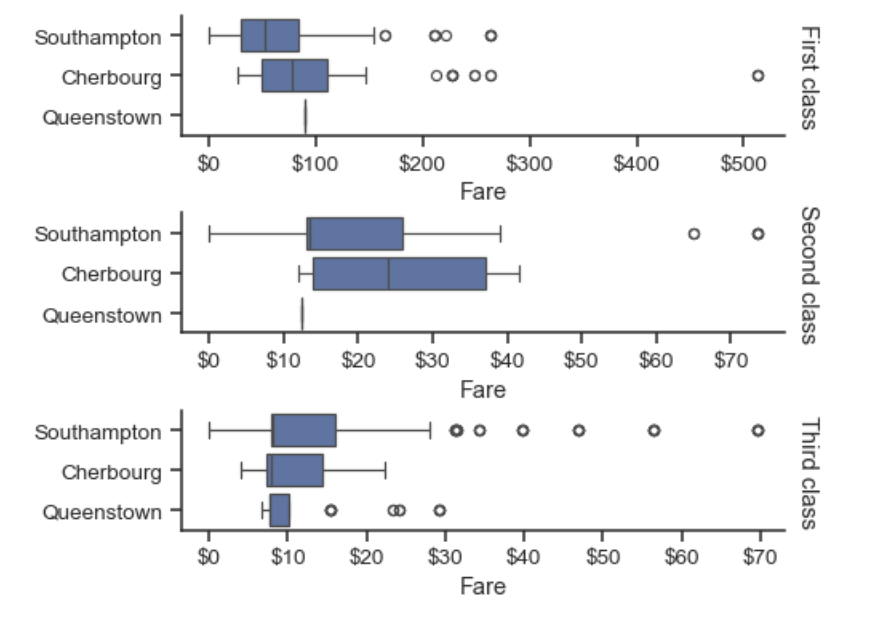

### Note on anonymizing data:  
**Source:** https://onlinelibrary.wiley.com/doi/full/10.1002/spe.2812

1. The key tradeoff is between risk and utility. If risk is governed by clear policy (e.g. GDPR), rule setting can be easier
2. Standard practices are:
    - Sampling
    - Aggregation (assign mean value)
    - Suppression
    - Masking
    - Categorization
    - Generalization
3. Algorithms exists that apply one or more of these methods to chunks of data and calculate risk and utility recursively

In [16]:
# Examining value counts to assign interpretable values
# Column 'pct_black/hispanic'
df_districts['pct_black/hispanic'].value_counts()

pct_black/hispanic
[0, 0.2[      116
[0.2, 0.4[     24
[0.4, 0.6[     17
[0.6, 0.8[     11
[0.8, 1[        8
Name: count, dtype: int64

In [17]:
# # Examining value counts to assign interpretable values
# Column 'pct_free/reduced'
df_districts['pct_free/reduced'].value_counts()

pct_free/reduced
[0.2, 0.4[    48
[0, 0.2[      46
[0.4, 0.6[    37
[0.6, 0.8[    13
[0.8, 1[       4
Name: count, dtype: int64

In [18]:
# Examining value counts to assign interpretable values
# Column 'county_connections_ratio'
df_districts['county_connections_ratio'].value_counts()

county_connections_ratio
[0.18, 1[    161
[1, 2[         1
Name: count, dtype: int64

In [19]:
# Examining value counts to assign interpretable values
# Column 'pp_total_raw'
df_districts['pp_total_raw'].value_counts()

pp_total_raw
[8000, 10000[     30
[10000, 12000[    17
[14000, 16000[    15
[12000, 14000[    15
[6000, 8000[      13
[16000, 18000[    13
[18000, 20000[     8
[20000, 22000[     2
[22000, 24000[     2
[4000, 6000[       2
[32000, 34000[     1
Name: count, dtype: int64